# Concrete Compressive Strength Dataset

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Concrete Compressive Strength Dataset
dataset = pd.read_excel('Concrete_Data.xls',header=1)
data = pd.DataFrame(dataset)

In [2]:
# Check if dataset has null values
result = dataset.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column
540            0
0              0
0.1            0
162            0
2.5            0
1040           0
676            0
28             0
79.98611076    0
dtype: int64


In [3]:
X = data.iloc[:, :8].values
Y = data.iloc[:, 8].values

print(data)
print(X.shape)
print(Y.shape)

        540      0    0.1    162   2.5    1040    676   28  79.98611076
0     540.0    0.0    0.0  162.0   2.5  1055.0  676.0   28    61.887366
1     332.5  142.5    0.0  228.0   0.0   932.0  594.0  270    40.269535
2     332.5  142.5    0.0  228.0   0.0   932.0  594.0  365    41.052780
3     198.6  132.4    0.0  192.0   0.0   978.4  825.5  360    44.296075
4     266.0  114.0    0.0  228.0   0.0   932.0  670.0   90    47.029847
...     ...    ...    ...    ...   ...     ...    ...  ...          ...
1024  276.4  116.0   90.3  179.6   8.9   870.1  768.3   28    44.284354
1025  322.2    0.0  115.6  196.0  10.4   817.9  813.4   28    31.178794
1026  148.5  139.4  108.6  192.7   6.1   892.4  780.0   28    23.696601
1027  159.1  186.7    0.0  175.6  11.3   989.6  788.9   28    32.768036
1028  260.9  100.5   78.3  200.6   8.6   864.5  761.5   28    32.401235

[1029 rows x 9 columns]
(1029, 8)
(1029,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give 93.7948904411872 accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressior']
models = [SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          AdaBoostRegressor(),
          GaussianProcessRegressor(kernel=kernel),
          LinearRegression(),
          MLPRegressor()]

param_distributions = {
    'SVR': {'C': [0.01, 0.1, 1, 10], 'gamma':[0.01, 0.1, 1]},
    'DecisionTreeRegressor': {'max_depth': [10, 20, 30, 40]},
    'RandomForestRegressor': {'max_depth': [10, 20,30,40],'n_estimators': [16, 32, 100],'bootstrap': [True, False],},
    'AdaBoostRegressor': {'n_estimators': [16, 32, 100],'learning_rate' : [0.2,0.4,1]},
    'GaussianProcessRegressor': {'normalize_y': ['True','False']},
    'LinearRegression': {},
    'MLPRegressior': {'hidden_layer_sizes': [(100,),(200,)],'activation':['tanh', 'relu'], 'max_iter':[200,400]},
}

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    np.random.seed(0);
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3)
    gridcv.fit(X_train, Y_train)
    Y_pred  = gridcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(r2_score(Y_test, Y_pred), 3)
    print("R2_score for " + names[counter] + ": "+str(accuracy[counter]))

R2_score for SVR: 0.748
R2_score for DecisionTreeRegressor: 0.645
R2_score for RandomForestRegressor: 0.84
R2_score for AdaBoostRegressor: 0.758
R2_score for GaussianProcessRegressor: 0.534
R2_score for LinearRegression: 0.556
R2_score for MLPRegressior: 0.787


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Concrete Compressive Strength Dataset models')

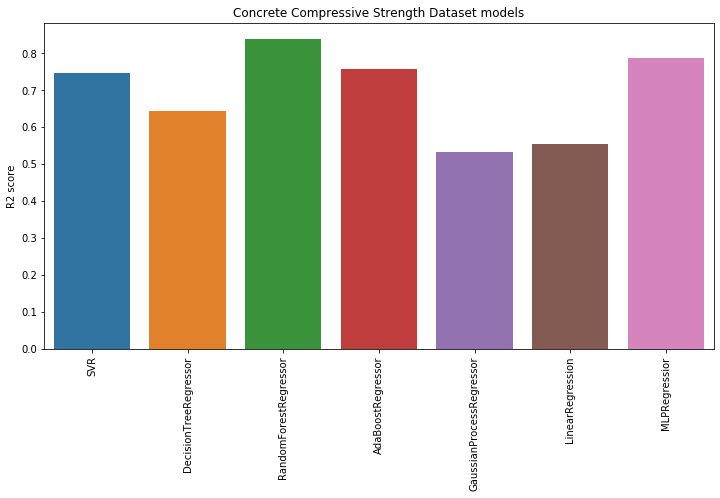

In [7]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('R2 score')
plt.title('Concrete Compressive Strength Dataset models')